<a href="https://colab.research.google.com/github/nguyentrong-phuc/Fuzzylogic/blob/main/BaiTap_Fuzzylogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 8.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=69c5e97fa882667c9f1c0412a9f68a3ee35cb45020c6158052e166386f99621c
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


4.631523301910857


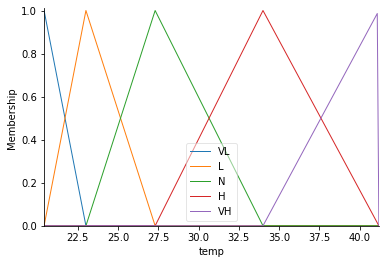

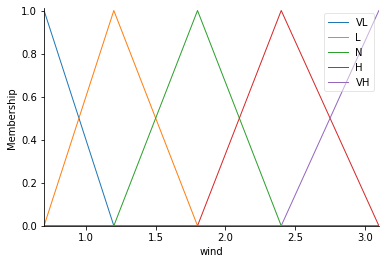

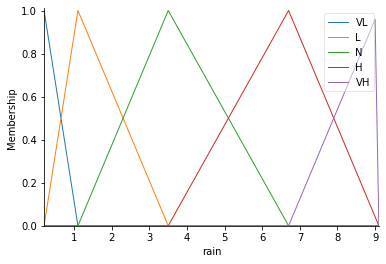

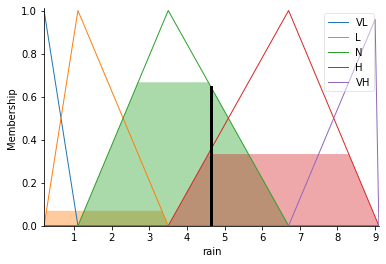

In [ ]:
# Bài Tập 1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temp = ctrl.Antecedent(np.arange(20.4,41.3,0.1),'temp')
wind = ctrl.Antecedent(np.arange(0.7,3.2,0.1),'wind')
rain=ctrl.Consequent(np.arange(0.2,9.2,0.1),'rain')
temp['VL']=fuzz.trimf(temp.universe,[20.4,20.4,23])
temp['L']=fuzz.trimf(temp.universe,[20.4,23,27.3])
temp['N']=fuzz.trimf(temp.universe,[23,27.3,34])
temp['H']=fuzz.trimf(temp.universe,[27.3,34,41.2])
temp['VH']=fuzz.trimf(temp.universe,[34,41.2,41.2])

wind['VL']=fuzz.trimf(wind.universe,[0.7,0.7,1.2])
wind['L']=fuzz.trimf(wind.universe,[0.7,1.2,1.8])
wind['N']=fuzz.trimf(wind.universe,[1.2,1.8,2.4])
wind['H']=fuzz.trimf(wind.universe,[1.8,2.4,3.1])
wind['VH']=fuzz.trimf(wind.universe,[2.4,3.1,3.1])

rain['VL']=fuzz.trimf(rain.universe,[0.2,0.2,1.1])
rain['L']=fuzz.trimf(rain.universe,[0.2,1.1,3.5])
rain['N']=fuzz.trimf(rain.universe,[1.1,3.5,6.7])
rain['H']=fuzz.trimf(rain.universe,[3.5,6.7,9.1])
rain['VH']=fuzz.trimf(rain.universe,[6.7,9.1,9.1])
temp.view()
wind.view()
rain.view()
#------------------------------------------------------
rule1 = ctrl.Rule(temp['VL'] & wind['VL'], rain['VL'])
rule2 = ctrl.Rule(temp['VL'] & wind['L'], rain['VL'])
rule3 = ctrl.Rule(temp['VL'] & wind['N'], rain['VL'])
rule4 = ctrl.Rule(temp['VL'] & wind['H'], rain['L'])
rule5 = ctrl.Rule(temp['VL'] & wind['VH'], rain['N'])

rule6 = ctrl.Rule(temp['L'] & wind['VL'], rain['VL'])
rule7 = ctrl.Rule(temp['L'] & wind['L'], rain['VL'])
rule8 = ctrl.Rule(temp['L'] & wind['N'], rain['L'])
rule9 = ctrl.Rule(temp['L'] & wind['H'], rain['N'])
rule10 = ctrl.Rule(temp['L'] & wind['VH'], rain['H'])

rule11 = ctrl.Rule(temp['N'] & wind['VL'], rain['VL'])
rule12= ctrl.Rule(temp['N'] & wind['L'], rain['L'])
rule13= ctrl.Rule(temp['N'] & wind['N'], rain['N'])
rule14= ctrl.Rule(temp['N'] & wind['H'], rain['H'])
rule15= ctrl.Rule(temp['N'] & wind['VH'], rain['VH'])

rule16 = ctrl.Rule(temp['H'] & wind['VL'], rain['L'])
rule17= ctrl.Rule(temp['H'] & wind['L'], rain['N'])
rule18= ctrl.Rule(temp['H'] & wind['N'], rain['H'])
rule19= ctrl.Rule(temp['H'] & wind['H'], rain['VH'])
rule20= ctrl.Rule(temp['H'] & wind['VH'], rain['VH'])

rule21 = ctrl.Rule(temp['VH'] & wind['VL'], rain['N'])
rule22= ctrl.Rule(temp['VH'] & wind['L'], rain['H'])
rule23= ctrl.Rule(temp['VH'] & wind['N'], rain['VH'])
rule24= ctrl.Rule(temp['VH'] & wind['H'], rain['VH'])
rule25= ctrl.Rule(temp['VH'] & wind['VH'], rain['VH'])
#------------------------------------------------------
rainf_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rainf = ctrl.ControlSystemSimulation(rainf_ctrl)
rainf.input['temp'] = 27
rainf.input['wind'] = 2
rainf.compute()
rain.view(sim=rainf)
print(rainf.output['rain'])